### In this file, I aim to improve my data science and visualization skills by analyzing data obtained from various sources. All work is done for personal learning purposes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lets prepare our data

In [2]:
df_iq = pd.read_csv("turkiye_mean_iq_data.csv")

In [3]:
df_iq= df_iq.drop(["Unnamed: 0","Katılımcı Sayısı","IQ Ortalama"],axis=1)

In [7]:
df_iq.rename(columns={"#":"Province Name","İl":"Average IQ"},inplace=True)

In [36]:
df_avg_education_time = pd.read_excel("illere gore ortalama egitim suresi.xltx")
df_avg_education_time.rename(columns={"Province name": "Province Name"}, inplace=True)
df_avg_education_time["Province Name"] = df_avg_education_time["Province Name"].str.strip()


In [37]:
avg_iq_and_avg_education_merge = pd.merge(df_iq,df_avg_education_time,on="Province Name",how="outer")

In [55]:
avg_iq_and_avg_education_merge.sort_values("Average IQ",inplace=True)
avg_iq_and_avg_education_merge

,Province Name,Average IQ,Province code,Total,Males,Females,Gender parity index
80,Bingöl,94.19,12.0,8.939653,9.965271,7.908337,0.793590
79,Siirt,94.52,56.0,8.514311,10.188770,6.672399,0.654878
78,Hakkari,95.16,30.0,9.561426,10.560436,8.404215,0.795821
77,Artvin,95.36,8.0,9.215184,10.219575,8.198701,0.802255
76,Kars,95.84,36.0,8.341115,9.364240,7.237439,0.772881
...,...,...,...,...,...,...,...
3,Muğla,104.12,48.0,9.725247,10.099340,9.342238,0.925034
2,İzmir,104.51,35.0,9.820948,10.292757,9.371000,0.910446
1,Ankara,104.91,6.0,10.692814,11.327607,10.095191,0.891202
0,Eskişehir,105.20,26.0,9.995942,10.723148,9.300807,0.867358


In [54]:
avg_iq_and_avg_education_merge.corr().loc[["Average IQ","Gender parity index "],["Average IQ","Gender parity index "]]

,Average IQ,Gender parity index
Average IQ,1.000000,0.664188
Gender parity index,0.664188,1.000000


##### Korelasyon Sonuçları: 
Bu pozitif bir korelasyondur. ortalama iq seviyesi ve toplumsal cinsiyet eşitliği endeksinin orta düzeyde güçlü bir ilişki içersisinde olduğunu gösterir.

##### Correlation Results:
This is a positive correlation. It shows that the average Gender Parity Index have a moderately strong relationship.

### Let's show this data in the graph

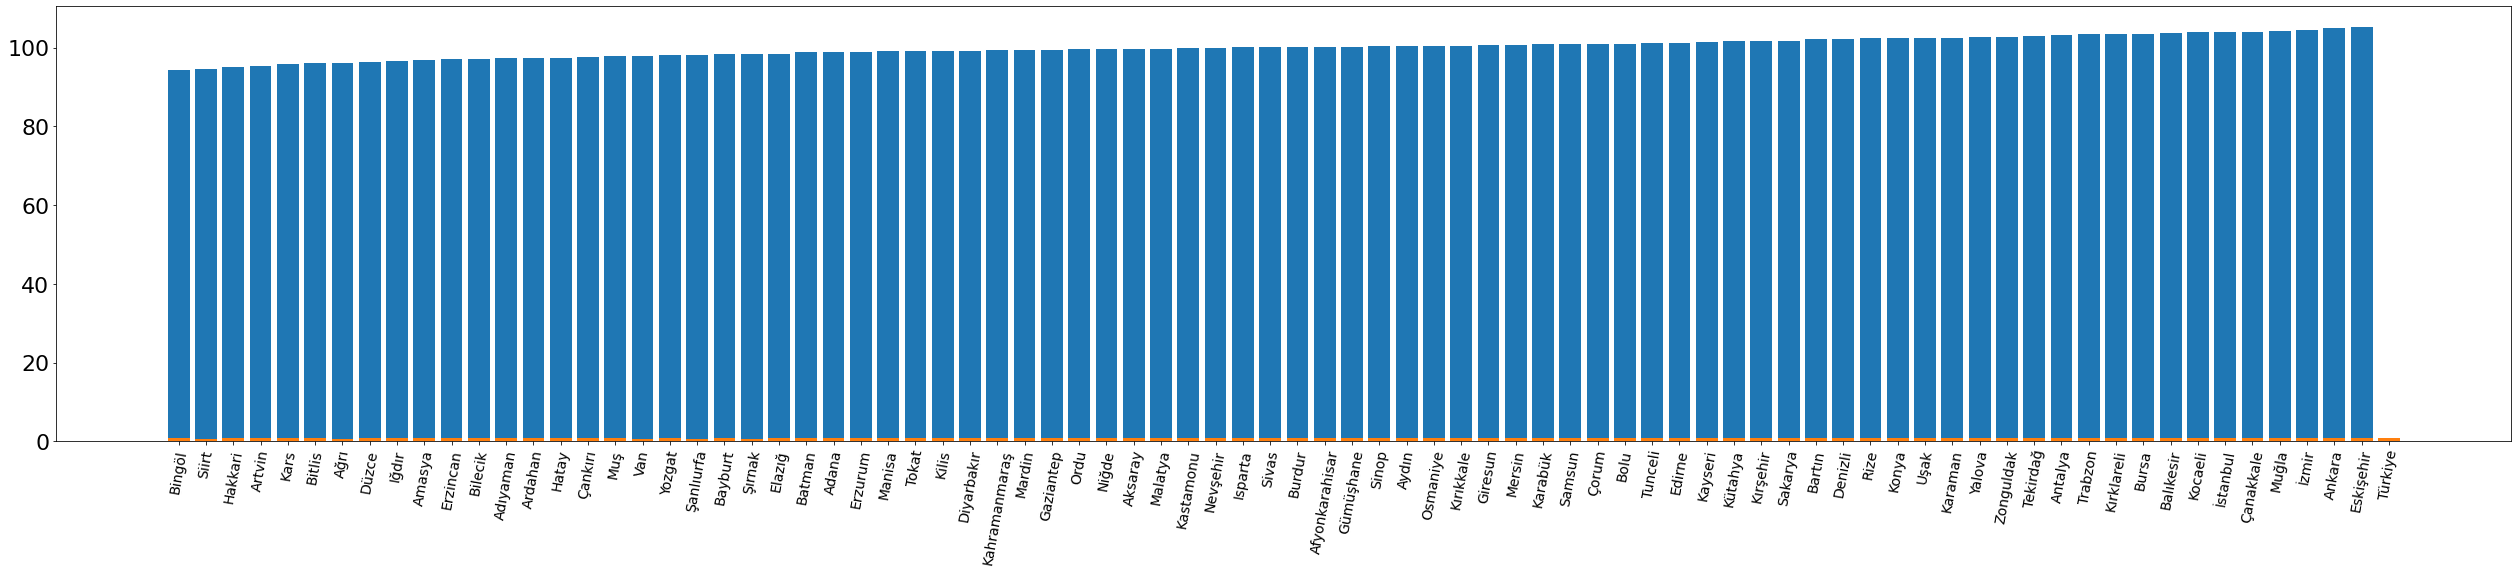

In [67]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.bar(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Average IQ"])
plt.bar(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Gender parity index "])
plt.show()

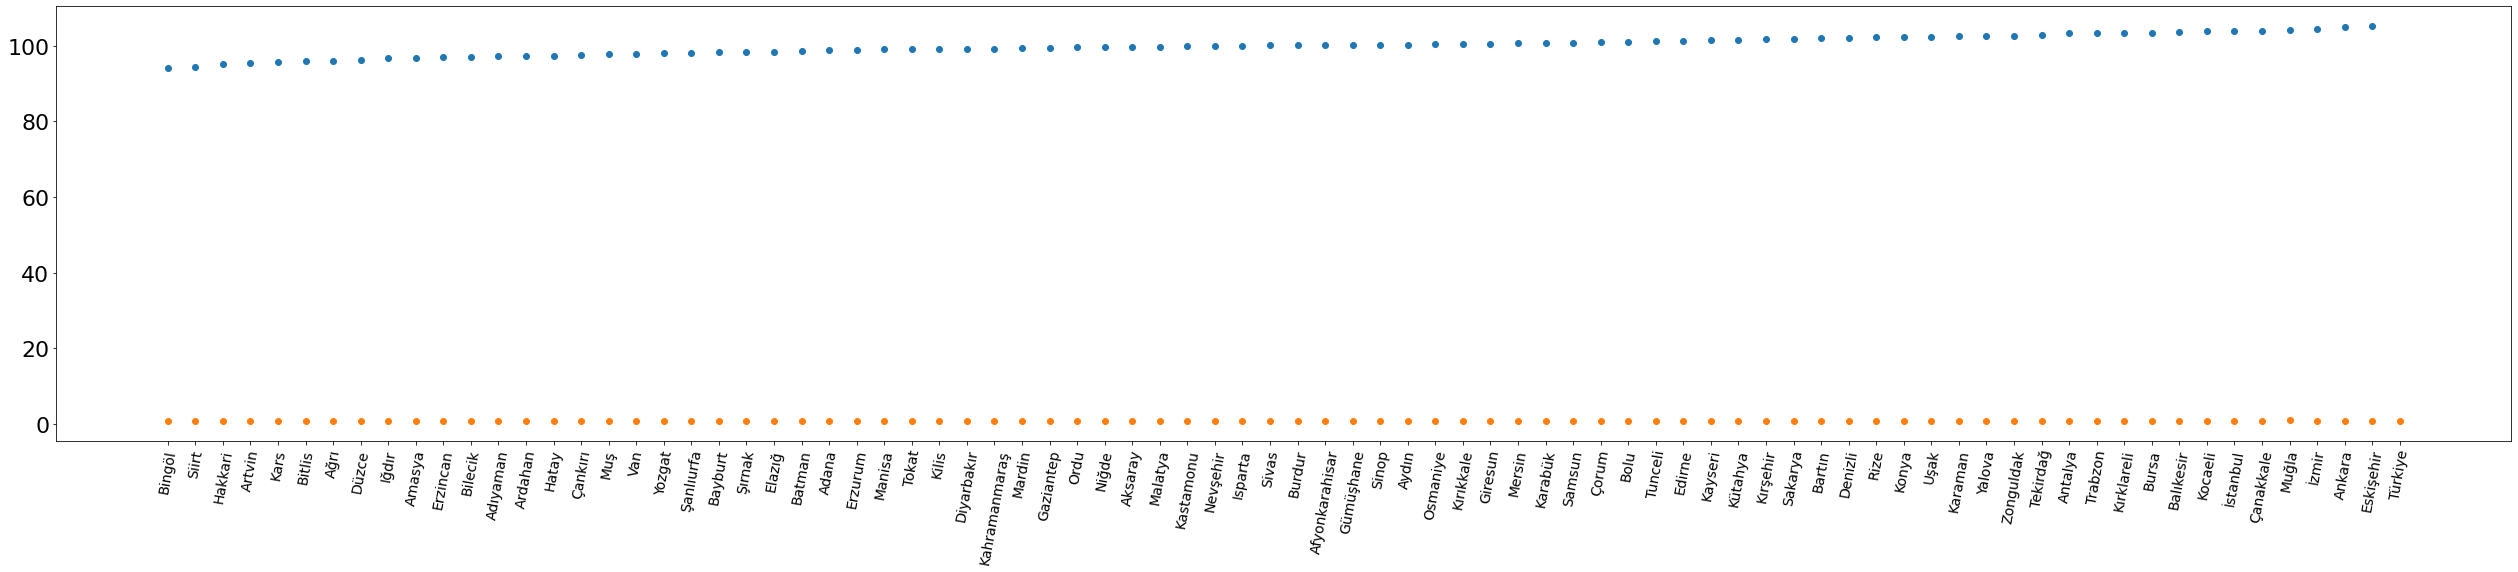

In [71]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.scatter(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Average IQ"])
plt.scatter(avg_iq_and_avg_education_merge["Province Name"],avg_iq_and_avg_education_merge["Gender parity index "])
plt.show()

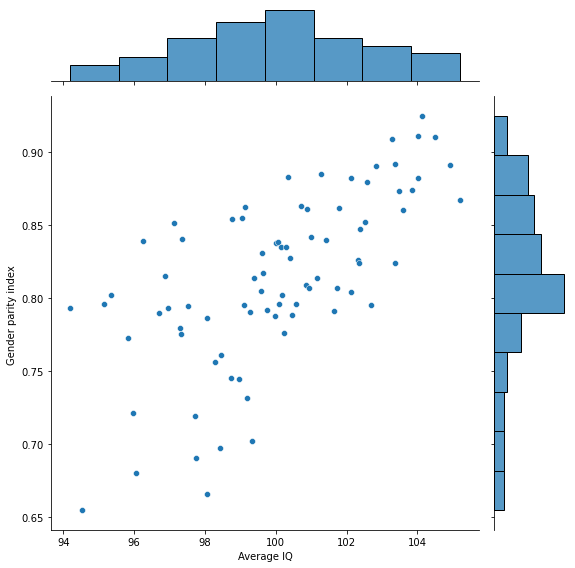

In [75]:
import seaborn as sns

sns.jointplot(
    data=avg_iq_and_avg_education_merge,
    x="Average IQ",
    y="Gender parity index ",
    kind="scatter",
    height=8
)
plt.show()
